## Smoke drink predictor

- Sex	male, female	
- age	round up to 5 years	
- height	round up to 5 cm[cm]
- weight	[kg]	
- sight_left	eyesight(left)	
- sight_right	eyesight(right)	
- hear_left	hearing left, 1(normal), 2(abnormal
- hear_right	hearing right, 1(normal), 2(abnormal)
- SBP	Systolic blood pressure[mmHg]
- DBP	Diastolic blood pressure[mmHg]
- BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole	total cholesterol[mg/dL]
- HDL_chole	HDL cholesterol[mg/dL]	HDL 
- LDL_chole	LDL cholesterol[mg/dL]	LDL 
- triglyceride	triglyceride[mg/dL]
- hemoglobin	hemoglobin[g/dL
- urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4
- serum_creatinine	serum(blood) creatinine[mg/dL]	
- SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]	
- SGOT_ALT	ALT(Alanine transaminase)[IU/L]	
- gamma_GTP	y-glutamyl transpeptidase[IU/L]	]
- SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke
- DRK_YN	Drinker or Not	

### IMPORTING PACKAGES

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS

In [74]:
current_y_is_smoking_or_drinking = 'SMK_stat_type_cd'
# current_y_is_smoking_or_drinking = 'DRK_YN'

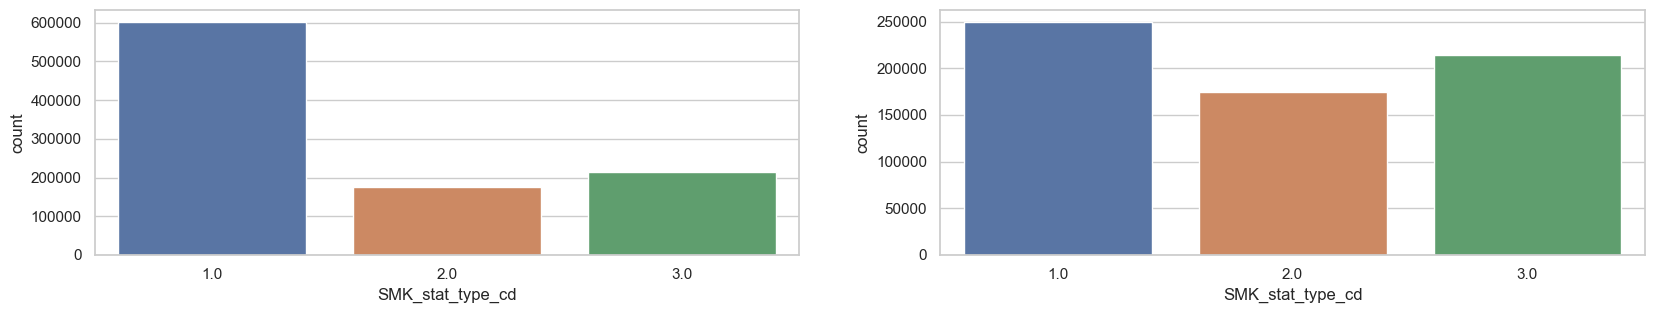

In [75]:
data = pd.read_csv('./data/smoking_driking.csv')
plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(2, 2, 1)
sns.countplot(x=current_y_is_smoking_or_drinking, data=data,)
plt.subplot(2, 2, 2)

n = 250000
df_1 = data[data[current_y_is_smoking_or_drinking] == 1].sample(n)
df_2 = data[data[current_y_is_smoking_or_drinking] == 2]
df_3 = data[data[current_y_is_smoking_or_drinking] == 3]
data = pd.concat([df_1, df_2, df_3], axis=0).reset_index(drop=True)
sns.countplot(x=current_y_is_smoking_or_drinking, data=data)
plt.show()

In [76]:
print('data : ' ,data.shape)
data.info()

data :  (638905, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638905 entries, 0 to 638904
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               638905 non-null  object 
 1   age               638905 non-null  int64  
 2   height            638905 non-null  int64  
 3   weight            638905 non-null  int64  
 4   waistline         638905 non-null  float64
 5   sight_left        638905 non-null  float64
 6   sight_right       638905 non-null  float64
 7   hear_left         638905 non-null  float64
 8   hear_right        638905 non-null  float64
 9   SBP               638905 non-null  float64
 10  DBP               638905 non-null  float64
 11  BLDS              638905 non-null  float64
 12  tot_chole         638905 non-null  float64
 13  HDL_chole         638905 non-null  float64
 14  LDL_chole         638905 non-null  float64
 15  triglyceride      638905 non-null  float64
 16 

In [77]:
data.describe()

age         height         weight      waistline  \
count  638905.000000  638905.000000  638905.000000  638905.000000   
mean       47.156823     164.261901      65.482036      82.470770   
std        13.783214       8.984050      12.586280      11.013907   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     160.000000      55.000000      76.000000   
50%        45.000000     165.000000      65.000000      82.500000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  638905.000000  638905.000000  638905.000000  638905.000000   
mean        0.998159       0.996144       1.030826       1.029447   
std         0.601100       0.601786       0.172847       0.169057   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.800000       0.800000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  638905.000000  638905.000000  ...  638905.000000  638905.000000   
mean      123.132956      76.679783  ...      55.646163     112.798206   
std        14.313452       9.884985  ...      14.915533      35.615128   
min        70.000000      34.000000  ...       1.000000       1.000000   
25%       113.000000      70.000000  ...      45.000000      89.000000   
50%       122.000000      77.000000  ...      54.000000     111.000000   
75%       132.000000      82.000000  ...      64.000000     135.000000   
max       270.000000     181.000000  ...     727.000000    2254.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  638905.000000  638905.000000  638905.000000     638905.000000   
mean      141.567462      14.556043       1.097999          0.891867   
std       111.575980       1.543107       0.448244          0.465204   
min         1.000000       1.000000       1.000000          0.100000   
25%        78.000000      13.500000       1.000000          0.700000   
50%       114.000000      14.700000       1.000000          0.900000   
75%       170.000000      15.700000       1.000000          1.000000   
max      6430.000000      24.200000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  638905.000000  638905.000000  638905.000000     638905.000000  
mean       26.709044      27.380687      42.451244          1.943582  
std        24.404712      26.376751      56.425043          0.850287  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      17.000000          1.000000  
50%        23.000000      21.000000      27.000000          2.000000  
75%        29.000000      32.000000      46.000000          3.000000  
max      9999.000000    4633.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [78]:
columns = data.columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [79]:
data.describe(include=['O'])

sex  DRK_YN
count   638905  638905
unique       2       2
top       Male       Y
freq    430125  370437

In [80]:
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [81]:
sex_mapping = {'Male': 1, 'Female': 0} 
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0} 
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [82]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    0   60     150      55       79.0         0.6          0.5        1.0   
1    0   45     160      50       51.5         0.7          0.6        1.0   
2    0   40     155      70       87.0         1.2          0.9        1.0   
3    1   25     175      65       80.0         0.9          0.9        1.0   
4    0   65     150      40       61.0         0.5          0.5        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  112.0  ...      150.0          82.0        13.6            1.0   
1         1.0  103.0  ...      112.0          74.0        12.0            1.0   
2         1.0  127.0  ...       71.0         144.0        12.1            1.0   
3         1.0  112.0  ...      115.0         110.0        14.7            1.0   
4         1.0  154.0  ...       93.0         121.0        11.1            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.5      31.0      23.0       18.0               1.0       0  
1               0.8      18.0      12.0       17.0               1.0       1  
2               0.7      35.0      39.0       26.0               1.0       0  
3               1.1      27.0      28.0       25.0               1.0       0  
4               0.9      20.0      14.0       12.0               1.0       0  

[5 rows x 24 columns]

In [83]:
is_smoking= data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    0
1    1
2    0
3    0
4    0
Name: DRK_YN, dtype: int64


### Categorical Variable Analysis

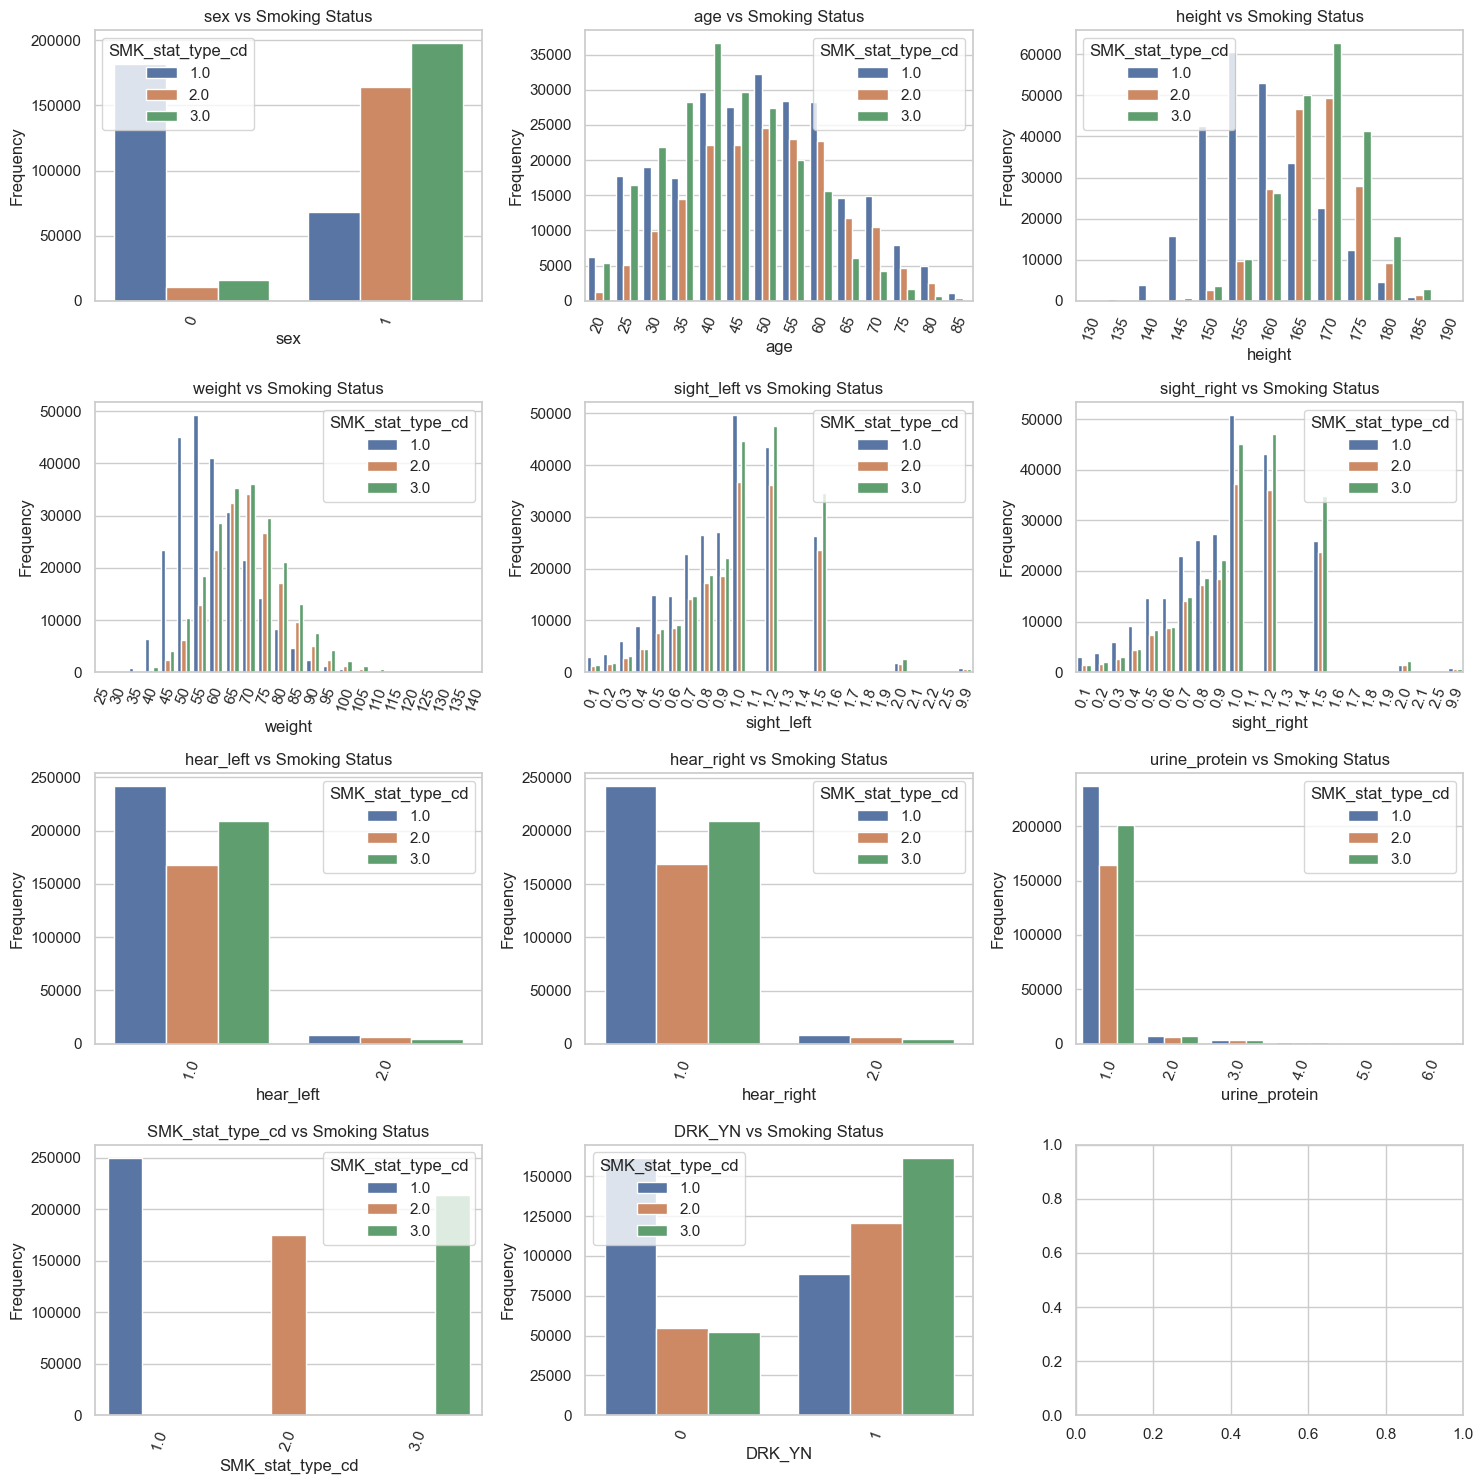

In [84]:
def plotting():
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))

    for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                                  "urine_protein", current_y_is_smoking_or_drinking, "DRK_YN"], start=1):
        sbp_data = data[column][0:100000]

        # Calculate the position in the 3x3 grid
        row = (idx - 1) // 4
        col = (idx - 1) % 3

        # Set the current subplot
        plt.subplot(4, 3, idx)

        sns.countplot(x=column, data=data,
                        hue=current_y_is_smoking_or_drinking)
        plt.xlabel(f'{column}')
        plt.ylabel("Frequency")
        plt.xticks(rotation=70)
        plt.title(f'{column} vs Smoking Status')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


plotting()

In [85]:
categorical_features = ['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                              "urine_protein"]
numerical_features = [col for col in data.columns if col not in categorical_features]

### Boxplot and removing outlier

In [86]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    0   60     150      55       79.0         0.6          0.5        1.0   
1    0   45     160      50       51.5         0.7          0.6        1.0   
2    0   40     155      70       87.0         1.2          0.9        1.0   
3    1   25     175      65       80.0         0.9          0.9        1.0   
4    0   65     150      40       61.0         0.5          0.5        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  112.0  ...      150.0          82.0        13.6            1.0   
1         1.0  103.0  ...      112.0          74.0        12.0            1.0   
2         1.0  127.0  ...       71.0         144.0        12.1            1.0   
3         1.0  112.0  ...      115.0         110.0        14.7            1.0   
4         1.0  154.0  ...       93.0         121.0        11.1            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.5      31.0      23.0       18.0               1.0       0  
1               0.8      18.0      12.0       17.0               1.0       1  
2               0.7      35.0      39.0       26.0               1.0       0  
3               1.1      27.0      28.0       25.0               1.0       0  
4               0.9      20.0      14.0       12.0               1.0       0  

[5 rows x 24 columns]

In [87]:
is_smoking.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [88]:
is_drinking.head()

0    0
1    1
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [89]:
data.shape

(638905, 24)

#### ANALYZING,  'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'

Plotting 1...
Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...


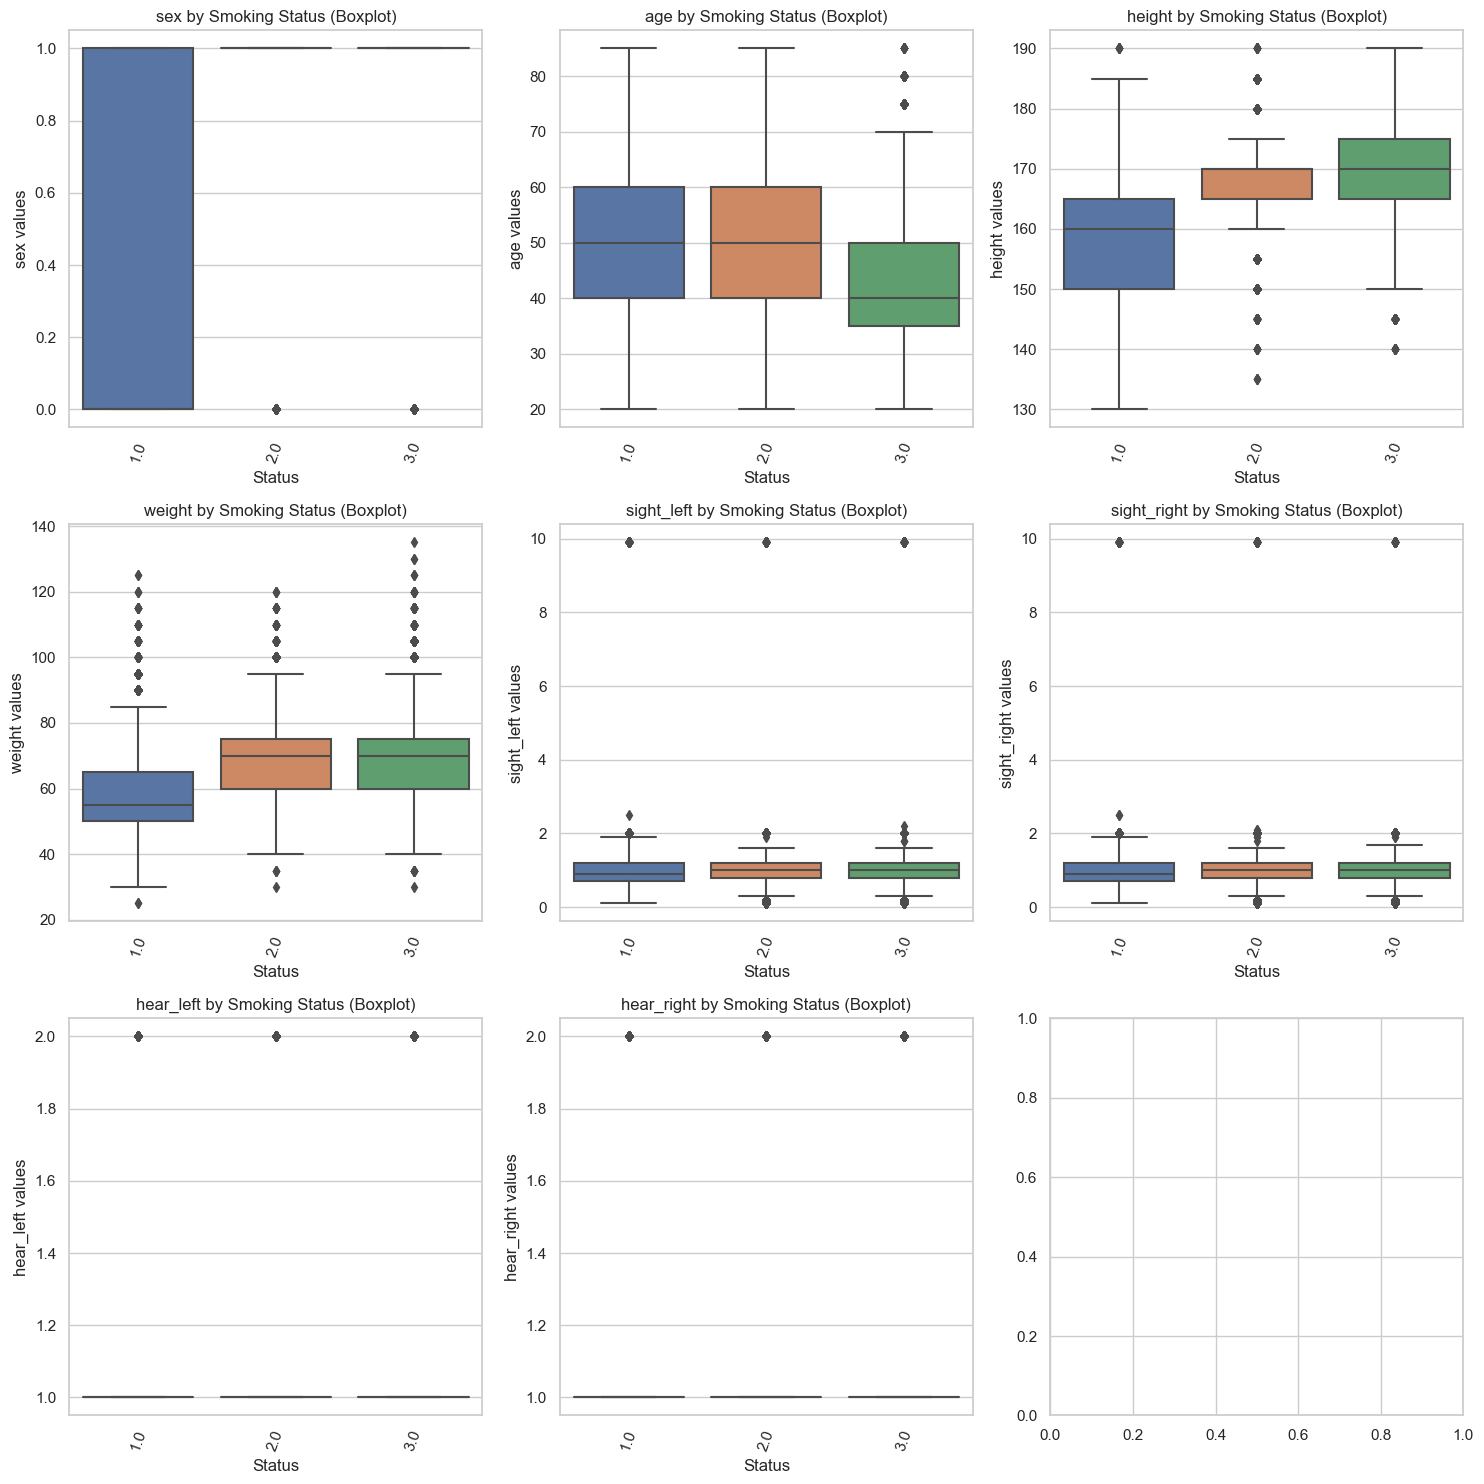

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.subplots(3, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left',
                              'sight_right', 'hear_left', 'hear_right'], start=1):
    print(f'Plotting {idx}...')

    plt.subplot(3, 3, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel("Status")
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

Some Observations from above graphs:
* (hear_left , hear_right) ---> categorical value 1 is dominated for all classes(1,2,3)
    * Hence, there is almost no variability of these features with target_class
    * So, we can drop these columns safely

In [91]:
data.drop(['hear_left', 'hear_right'], axis=1, inplace=True)

#### ANALYZING, 'waistline' 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'

Plotting 1...
Number of item greater than 0.999 percentile: 115.0
Number of values greater than 115.0 in DBP: 618
Number of rows removed: 618
Number of unique values :  623
Plotting 2...
Number of item greater than 0.999 percentile: 184.0
Number of values greater than 184.0 in DBP: 630
Number of rows removed: 630
Number of unique values :  113
Plotting 3...
Number of item greater than 0.999 percentile: 117.0
Number of values greater than 117.0 in DBP: 586
Number of rows removed: 586
Number of unique values :  83
Plotting 4...
Number of item greater than 0.999 percentile: 328.0
Number of values greater than 328.0 in DBP: 625
Number of rows removed: 625
Number of unique values :  294
Plotting 5...
Number of item greater than 0.999 percentile: 350.0
Number of values greater than 350.0 in DBP: 634
Number of rows removed: 634
Number of unique values :  293
Plotting 6...
Number of item greater than 0.999 percentile: 120.0
Number of values greater than 120.0 in DBP: 577
Number of rows removed

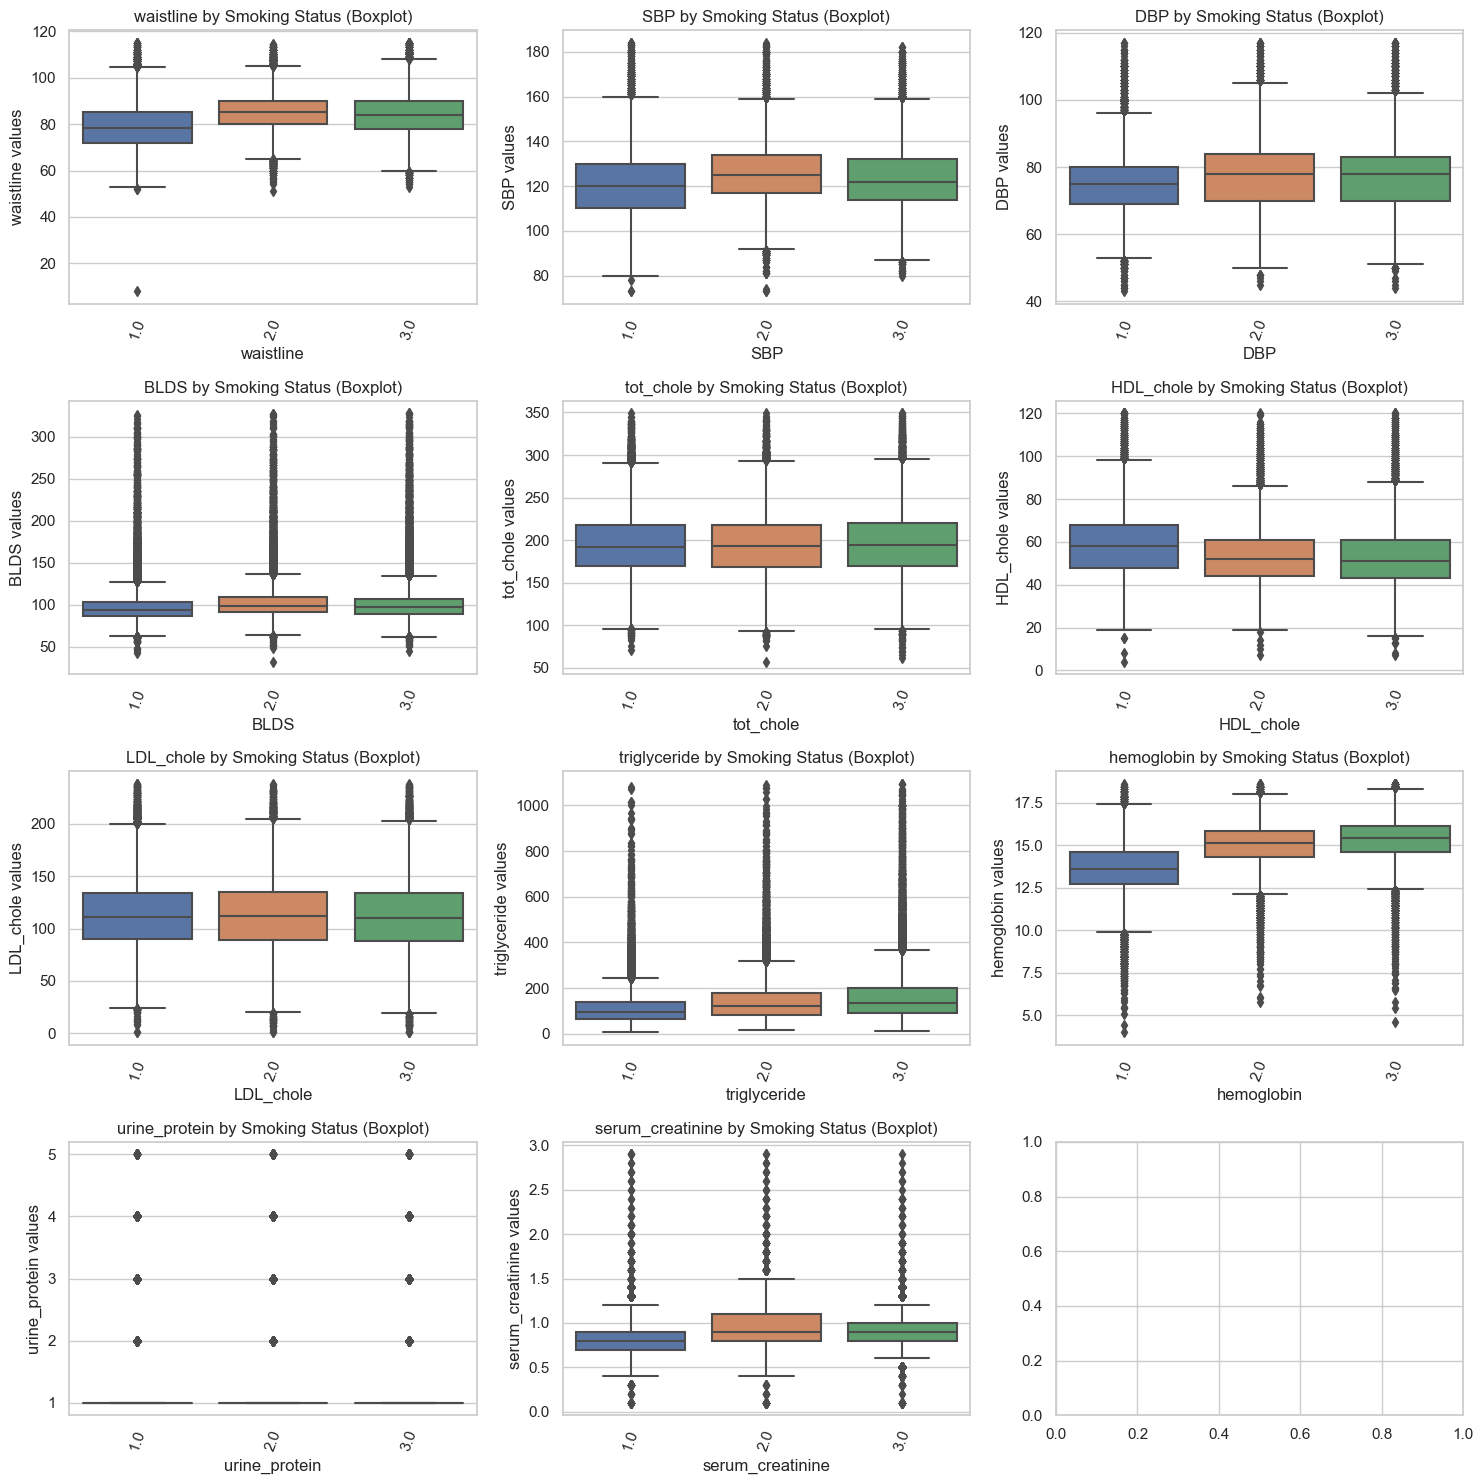

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    print(f'Plotting {idx}...')

    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))

sns.set(style="whitegrid")
plt.subplots(4, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(4, 3, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

* Feature : urine_protein is also single class dominated, no variability with target_class
* Hence, I choose to drop this column

In [93]:
data.drop(['urine_protein'], axis=1, inplace=True)

#### ANALYZING, SGOT_AST,	SGOT_ALT and gamma_GTP

Plotting 1...
Number of item greater than 0.999 percentile: 211.0
Number of values greater than 211.0 in DBP: 632
Number of rows removed: 632
Number of unique values :  211
Plotting 2...
Number of item greater than 0.999 percentile: 206.0
Number of values greater than 206.0 in DBP: 629


Number of rows removed: 629
Number of unique values :  206
Plotting 3...
Number of item greater than 0.999 percentile: 668.0
Number of values greater than 668.0 in DBP: 630
Number of rows removed: 630
Number of unique values :  667
Plotting 1...
Plotting 2...
Plotting 3...


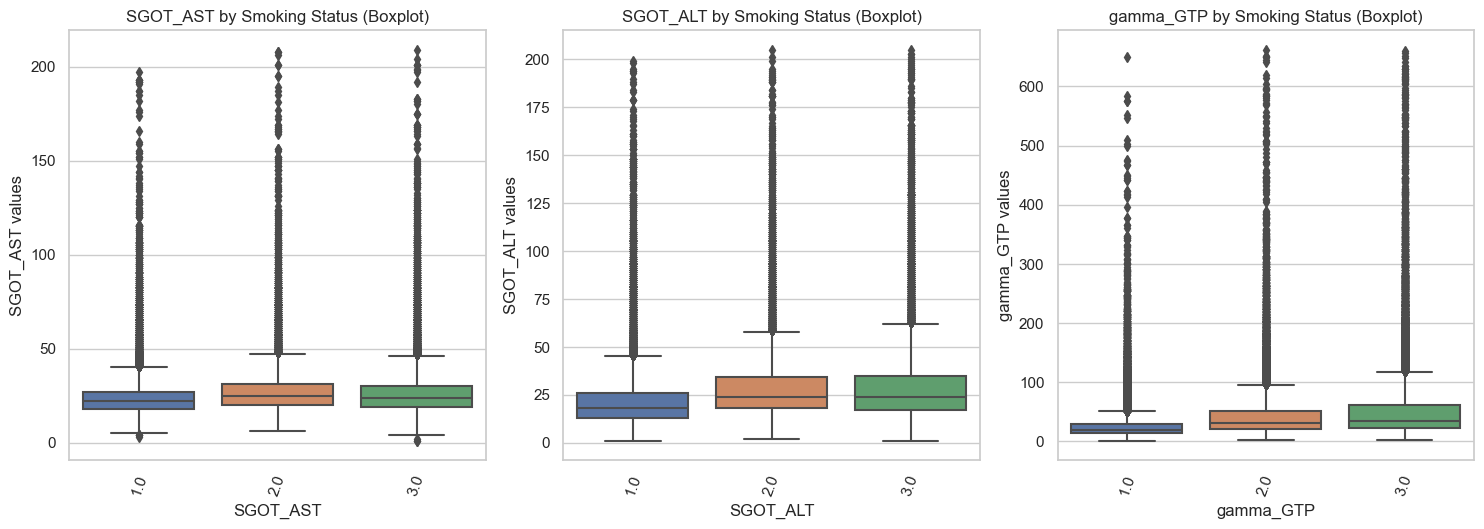

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')
    
    print("Number of unique values : ", len(data[column].unique()))

sns.set(style="whitegrid")
plt.subplots(1, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    plt.subplot(3, 3, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

### Mean, Std Dev and Median

In [95]:
data.shape

(630497, 21)

In [96]:
for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    print(idx, " : ", column, " : ", "$#" * 25)
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  :  sex  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: sex, Subset 1 - Mean: 0.2727, Std Dev: 0.4454, Median: 0.0000
Column: sex, Subset 2 - Mean: 0.9374, Std Dev: 0.2422, Median: 1.0000
Column: sex, Subset 3 - Mean: 0.9238, Std Dev: 0.2653, Median: 1.0000
2  :  age  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: age, Subset 1 - Mean: 48.4515, Std Dev: 14.8143, Median: 50.0000
Column: age, Subset 2 - Mean: 50.1041, Std Dev: 12.9975, Median: 50.0000


Column: age, Subset 3 - Mean: 43.1900, Std Dev: 12.1706, Median: 40.0000
3  :  height  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: height, Subset 1 - Mean: 158.5625, Std Dev: 8.6982, Median: 160.0000
Column: height, Subset 2 - Mean: 167.3832, Std Dev: 6.8653, Median: 170.0000
Column: height, Subset 3 - Mean: 168.3643, Std Dev: 7.1580, Median: 170.0000
4  :  weight  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: weight, Subset 1 - Mean: 59.2678, Std Dev: 11.2738, Median: 55.0000
Column: weight, Subset 2 - Mean: 69.3603, Std Dev: 10.8391, Median: 70.0000
Column: weight, Subset 3 - Mean: 69.3841, Std Dev: 12.1642, Median: 70.0000
5  :  waistline  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: waistline, Subset 1 - Mean: 78.8810, Std Dev: 9.4712, Median: 78.5000
Column: waistline, Subset 2 - Mean: 85.2572, Std Dev: 8.1237, Median: 85.0000
Column: waistline, Subset 3 - Mean: 84.0847, Std Dev: 8.7625, Median: 84.0000
6  :  sight_left  :  $#$#$#

### Countplot by hue

Working with index: 1	;column name: SBP
Working with index: 2	;column name: DBP
Working with index: 3	;column name: BLDS
Working with index: 4	;column name: tot_chole
Working with index: 5	;column name: HDL_chole
Working with index: 6	;column name: LDL_chole
Working with index: 7	;column name: triglyceride
Working with index: 8	;column name: hemoglobin
Working with index: 9	;column name: serum_creatinine
Working with index: 10	;column name: SGOT_AST
Working with index: 11	;column name: SGOT_ALT
Working with index: 12	;column name: gamma_GTP


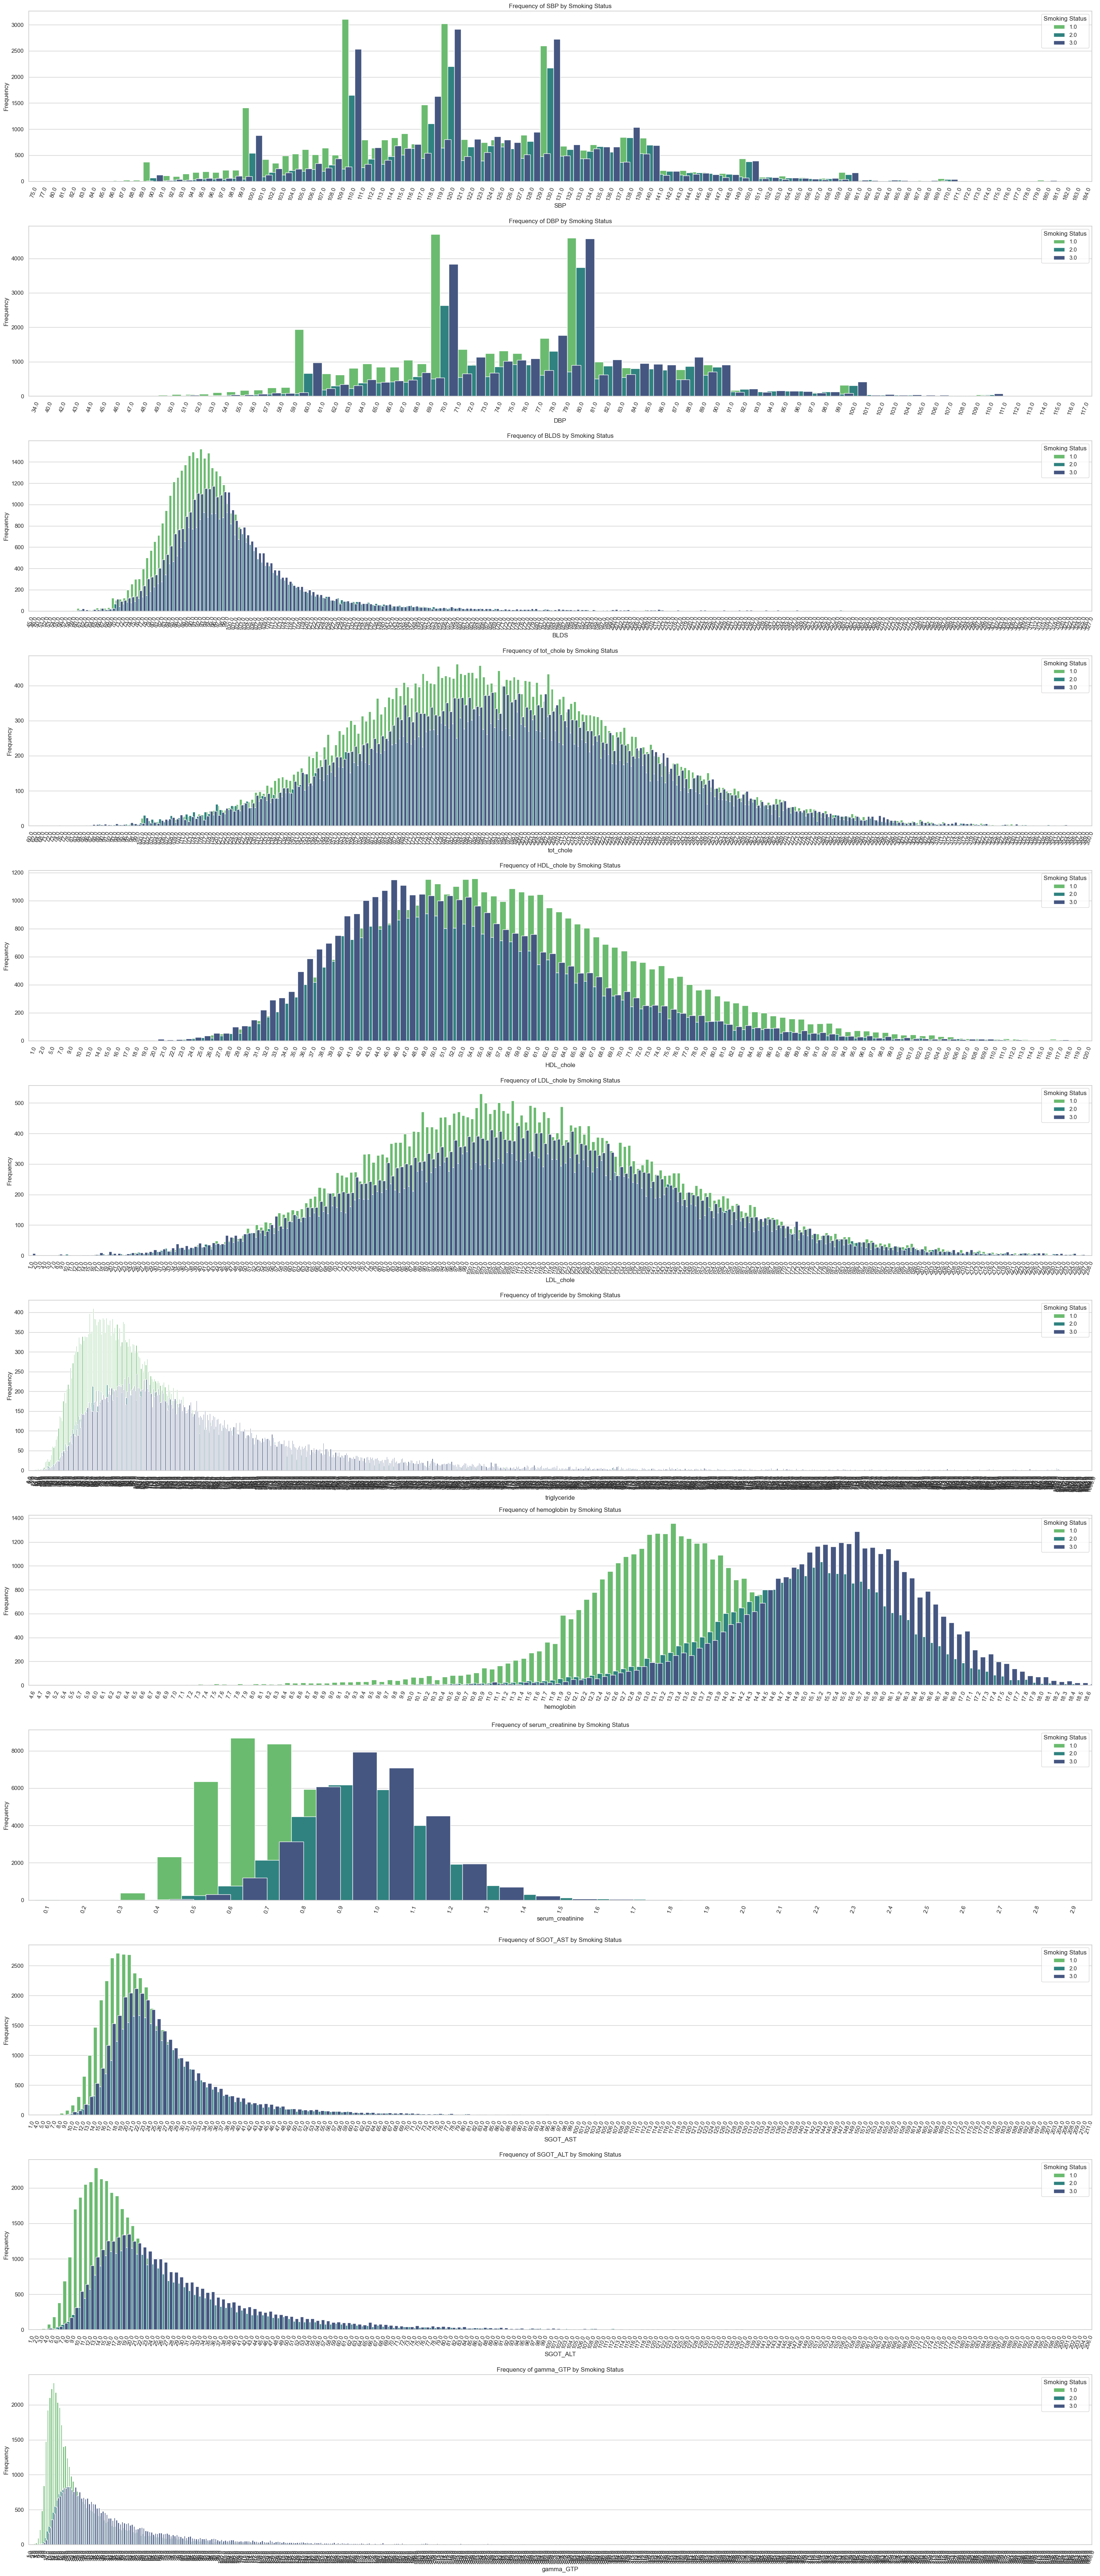

In [97]:
sns.set(style="whitegrid")
plt.subplots(12, 1, figsize=(30, 70))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    plt.subplot(12, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data, width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(f"Working with index:",end=' ') , print(idx , end='\t'), print(";column name: " , end=""), print(column,)
plt.tight_layout()
plt.show()

### Heatmap

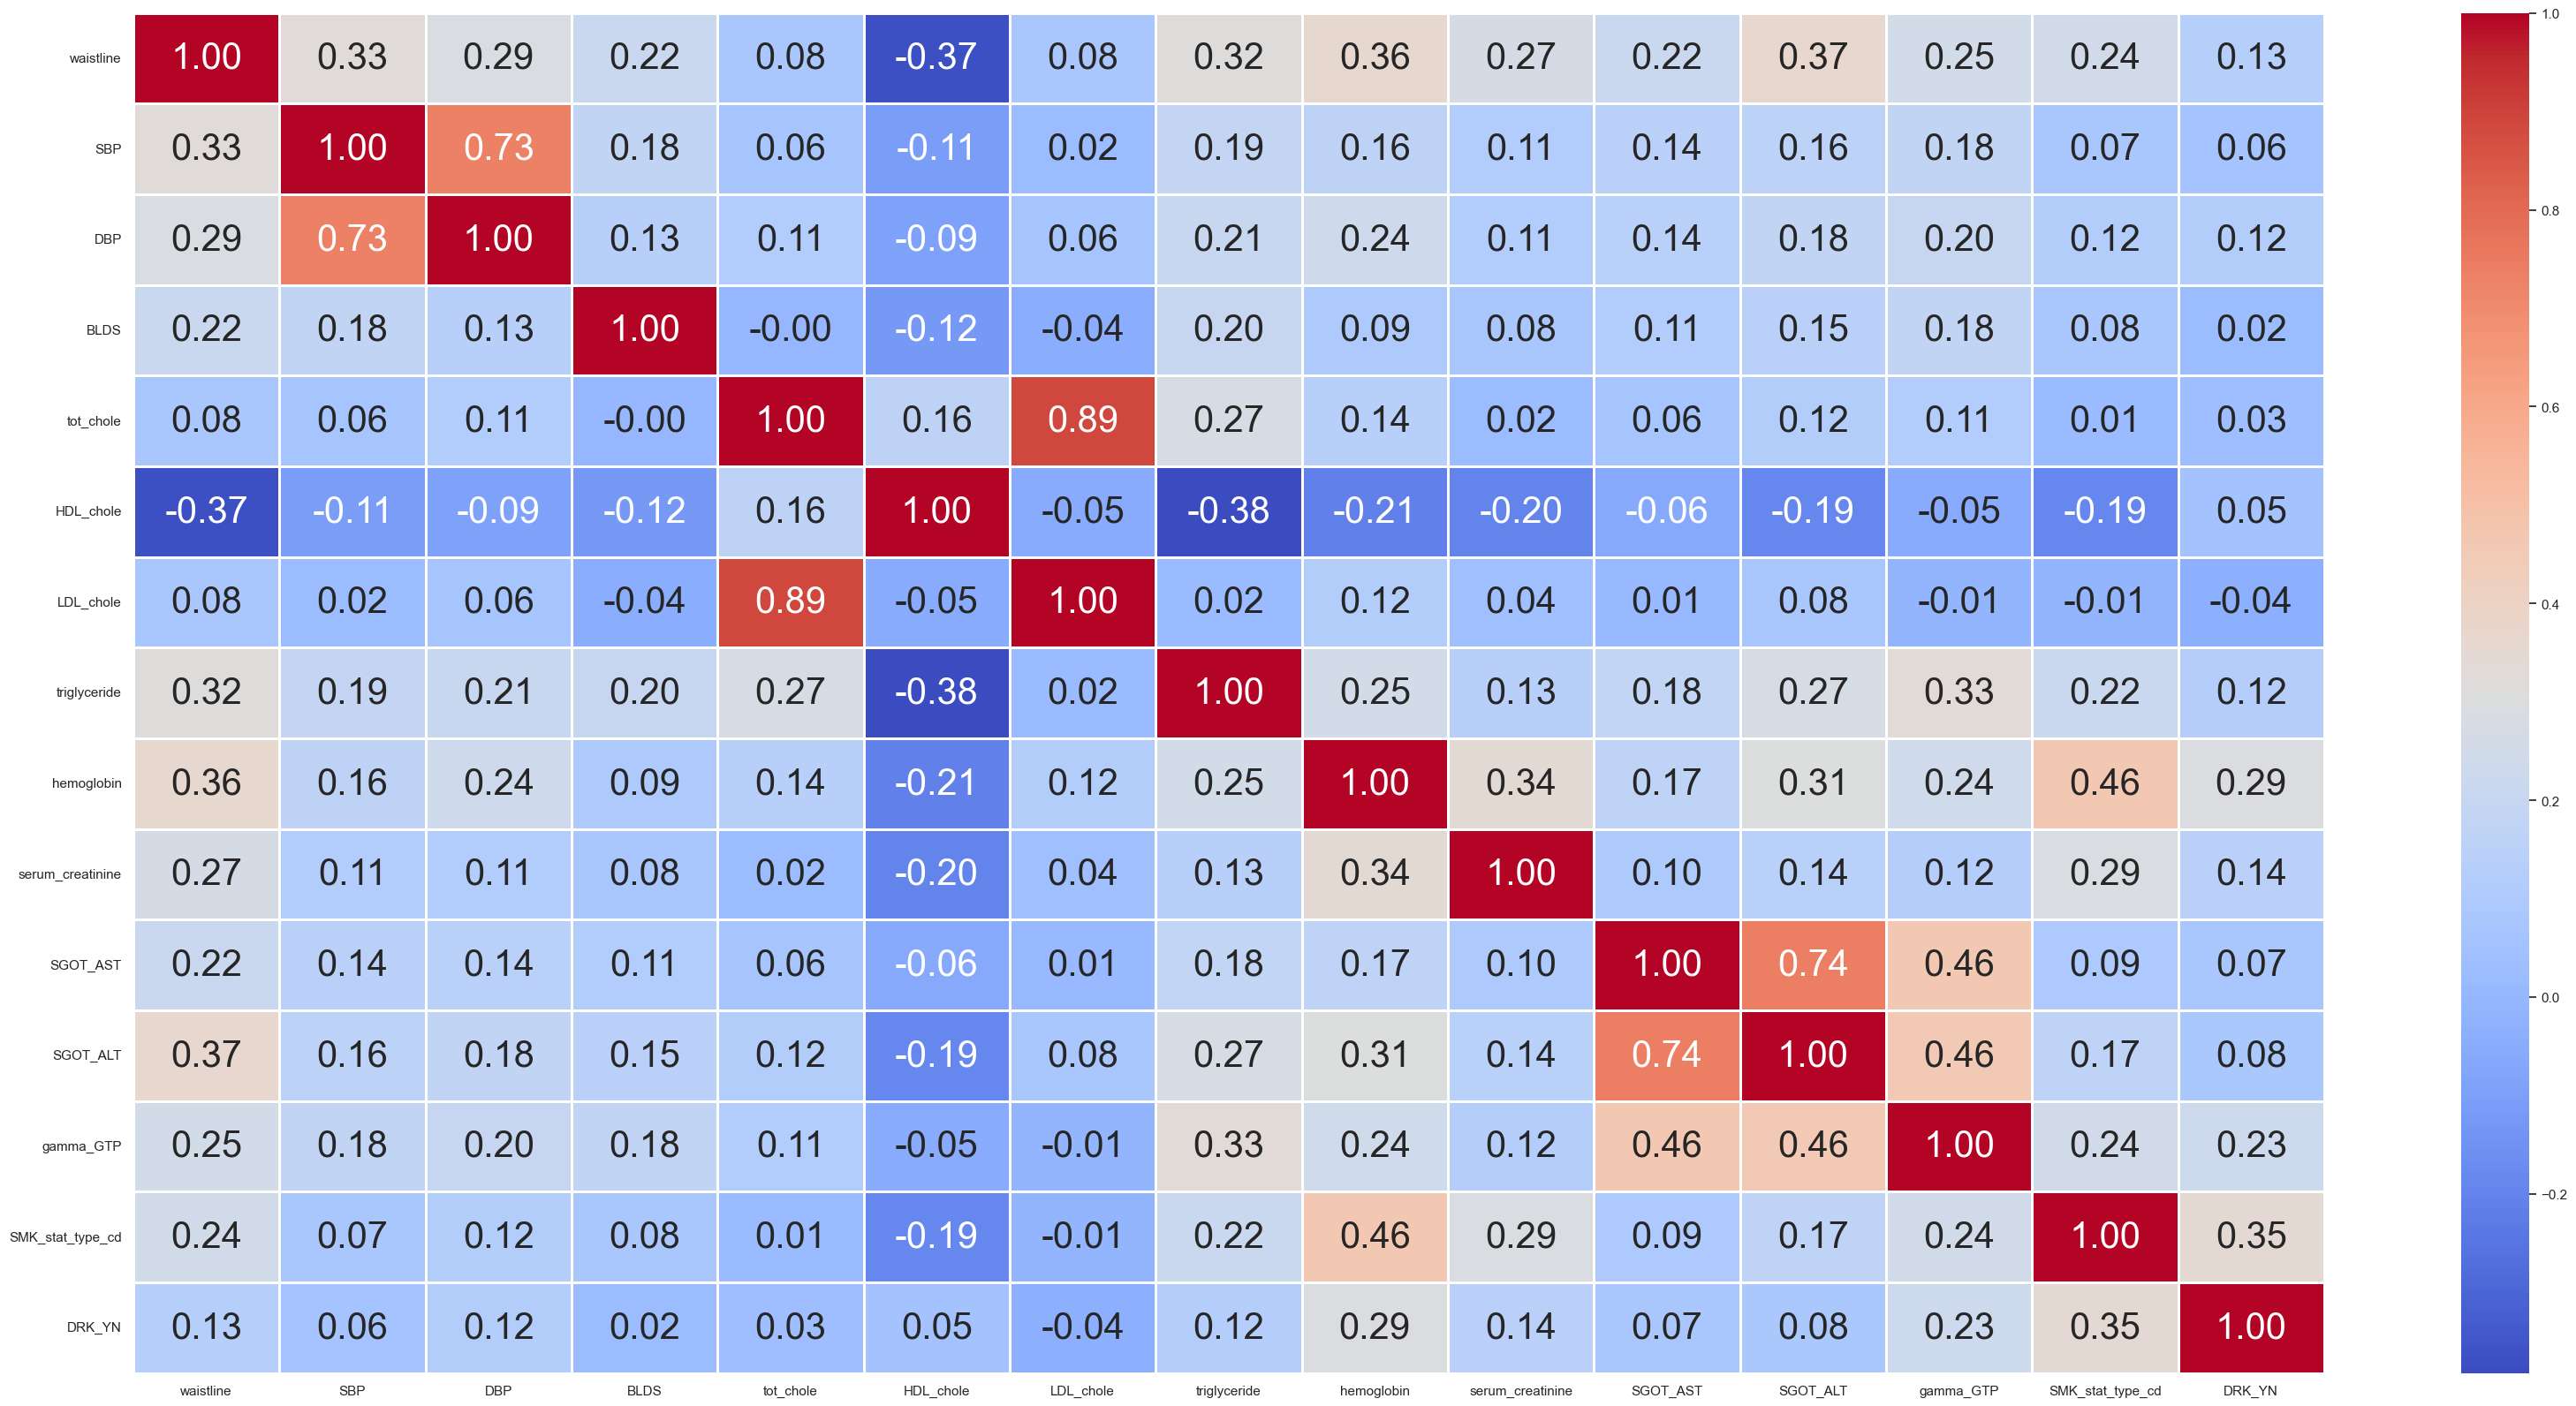

In [98]:
def heatmap():
    plt.figure(figsize=(40, 20))
    sns.heatmap(data.loc[:, numerical_features].corr(),
                annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, annot_kws={"fontsize": 30}
                )
    plt.show()


heatmap()

### Pair Plots

In [99]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right    SBP   DBP  \
0    0   60     150      55       79.0         0.6          0.5  112.0  69.0   
1    0   45     160      50       51.5         0.7          0.6  103.0  65.0   
2    0   40     155      70       87.0         1.2          0.9  127.0  75.0   
3    1   25     175      65       80.0         0.9          0.9  112.0  66.0   
4    0   65     150      40       61.0         0.5          0.5  154.0  86.0   

    BLDS  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0   88.0  ...       50.0      150.0          82.0        13.6   
1  103.0  ...       50.0      112.0          74.0        12.0   
2  112.0  ...       42.0       71.0         144.0        12.1   
3   76.0  ...       37.0      115.0         110.0        14.7   
4  112.0  ...       60.0       93.0         121.0        11.1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.5      31.0      23.0       18.0               1.0       0  
1               0.8      18.0      12.0       17.0               1.0       1  
2               0.7      35.0      39.0       26.0               1.0       0  
3               1.1      27.0      28.0       25.0               1.0       0  
4               0.9      20.0      14.0       12.0               1.0       0  

[5 rows x 21 columns]

In [100]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [101]:
custom_colors = ['#2B2A4C', '#B31312', '#EEE2DE', 
                 '#EA906C', '#DAF7A6', '#1287A5', '#F4D03F', '#00D2D3', '#FF5733', 
                 '#900C3F', '#581845', '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', 
                 '#00D2D3', '#FF5733']

In [102]:
def pairplot(data):
    print(data.head())
    sns.pairplot(data=data, hue=current_y_is_smoking_or_drinking, markers=[
                 "o", "s"], palette=custom_colors, diag_kind="kde", height=2.5)
    plt.show()

#### Pair Plots betwween age , height , weight , waistline

        age  height  weight  waistline  SMK_stat_type_cd
225808   40     145      65       88.0               1.0
398399   55     170      70       81.0               2.0
90950    50     155      55       79.0               1.0
452853   50     155      60       76.0               3.0
310331   60     175      75       93.3               2.0


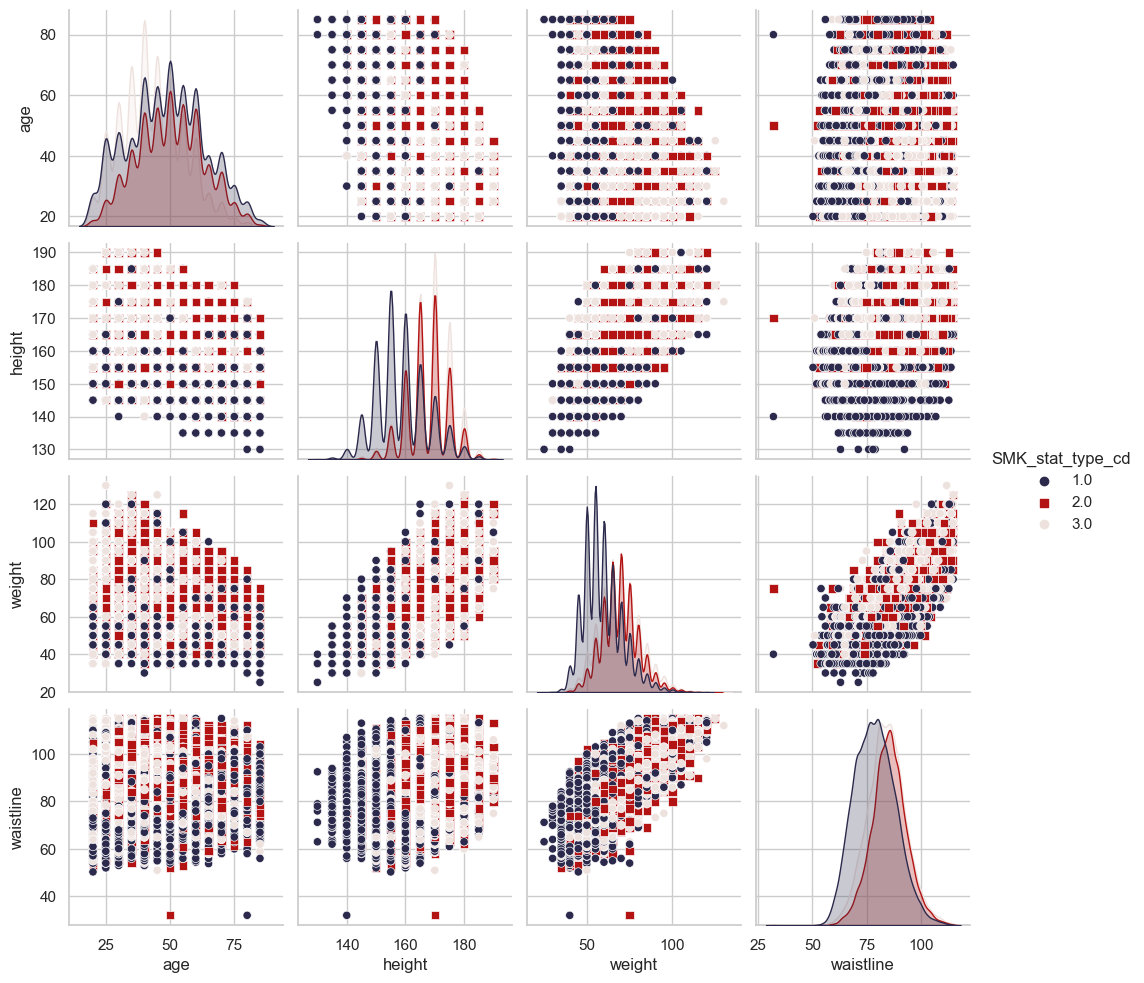

In [103]:
data_changed = {
    'age': data["age"], 'height': data["height"], 'weight': data["weight"], 'waistline': data["waistline"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween sight_left, sight_right, hear_left, hear_right

        sight_left  sight_right  SMK_stat_type_cd
254759         0.3          0.8               2.0
478965         0.8          1.0               3.0
171589         0.7          1.0               1.0
272095         0.7          0.7               2.0
91529          1.0          1.0               1.0


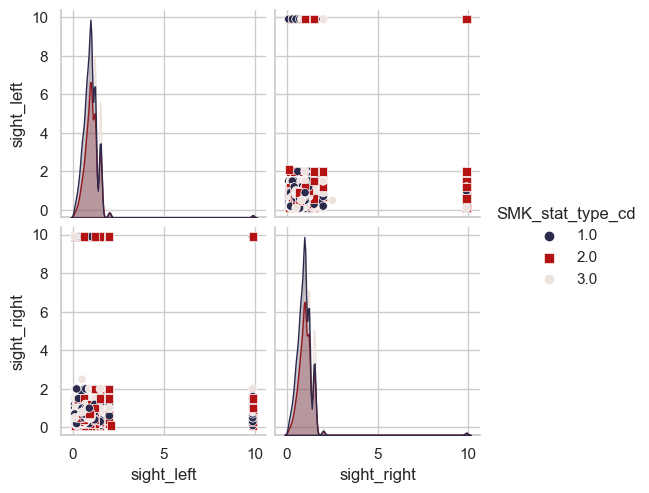

In [104]:
data_changed = {
    'sight_left': data["sight_left"], 'sight_right': data["sight_right"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between sbp, sbp and blds 

          SBP    DBP   BLDS  SMK_stat_type_cd
579398  145.0  100.0  168.0               3.0
239423   96.0   64.0  100.0               1.0
196396  120.0   70.0   93.0               1.0
299317  126.0   76.0   94.0               2.0
305875  109.0   61.0   92.0               2.0


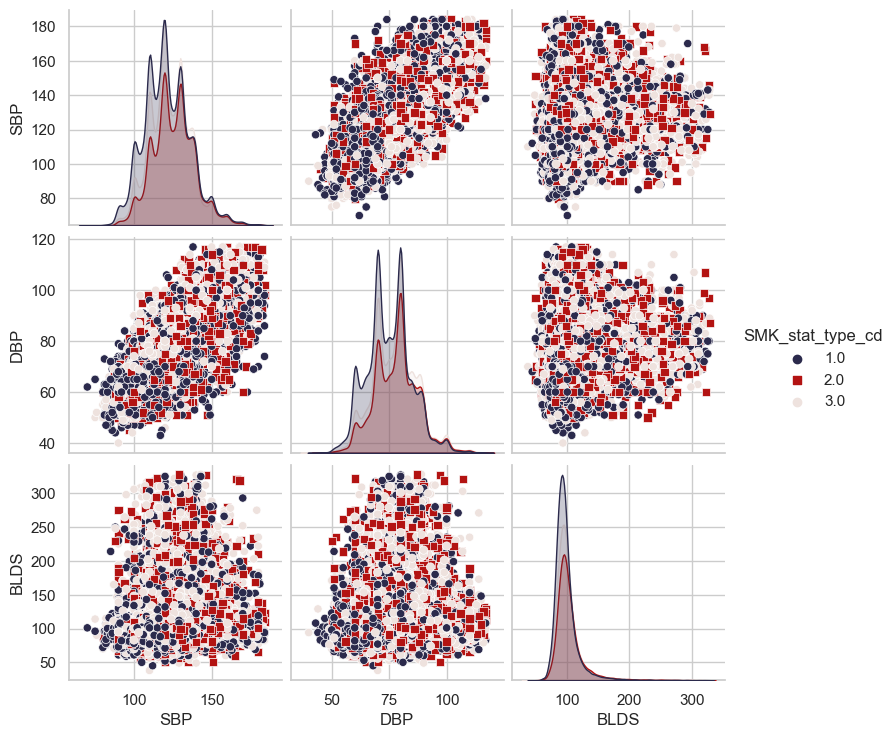

In [105]:
data_changed = {
    'SBP': data["SBP"], 'DBP': data["DBP"], 'BLDS': data["BLDS"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between tot_chole, HDL_chole and LDL_chole 

        tot_chole  HDL_chole  LDL_chole  SMK_stat_type_cd
170224      199.0       39.0      127.0               1.0
310085      186.0       47.0      119.0               2.0
124222      192.0       63.0      118.0               1.0
294419      150.0       42.0       59.0               2.0
239222      211.0       46.0      136.0               1.0


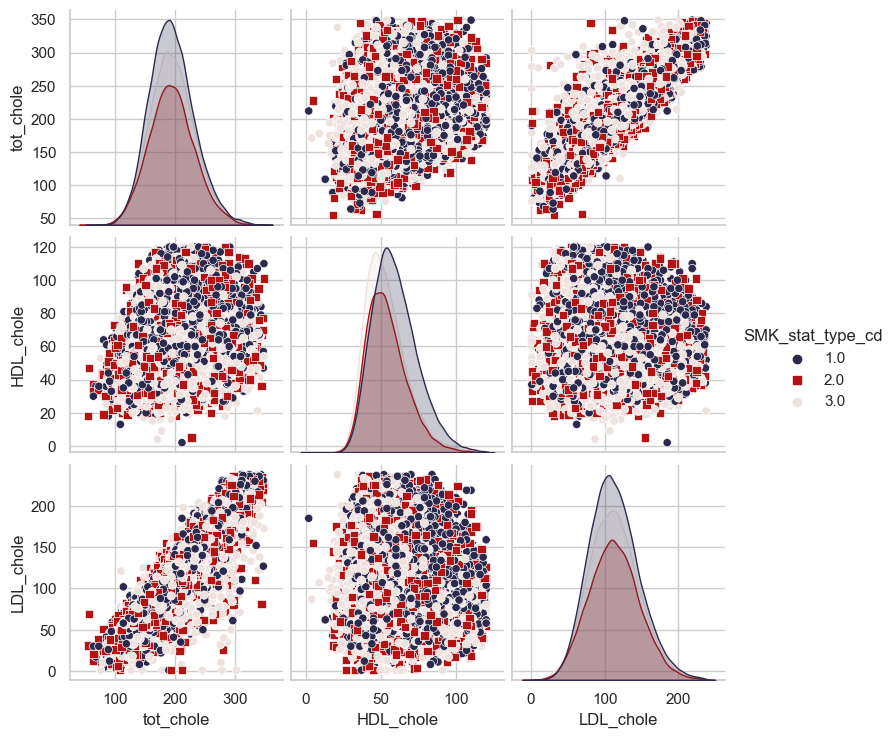

In [106]:
data_changed = {
    'tot_chole': data["tot_chole"], 'HDL_chole': data["HDL_chole"], 'LDL_chole': data["LDL_chole"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between triglyceride, hemoglobin, urine_protein and serum_creatinine

        triglyceride  hemoglobin  serum_creatinine  SMK_stat_type_cd
588281          58.0        14.9               1.0               3.0
309766         239.0        14.7               0.6               2.0
96144          106.0        15.3               0.6               1.0
53753           75.0        11.9               0.6               1.0
361309         169.0        14.9               0.9               2.0


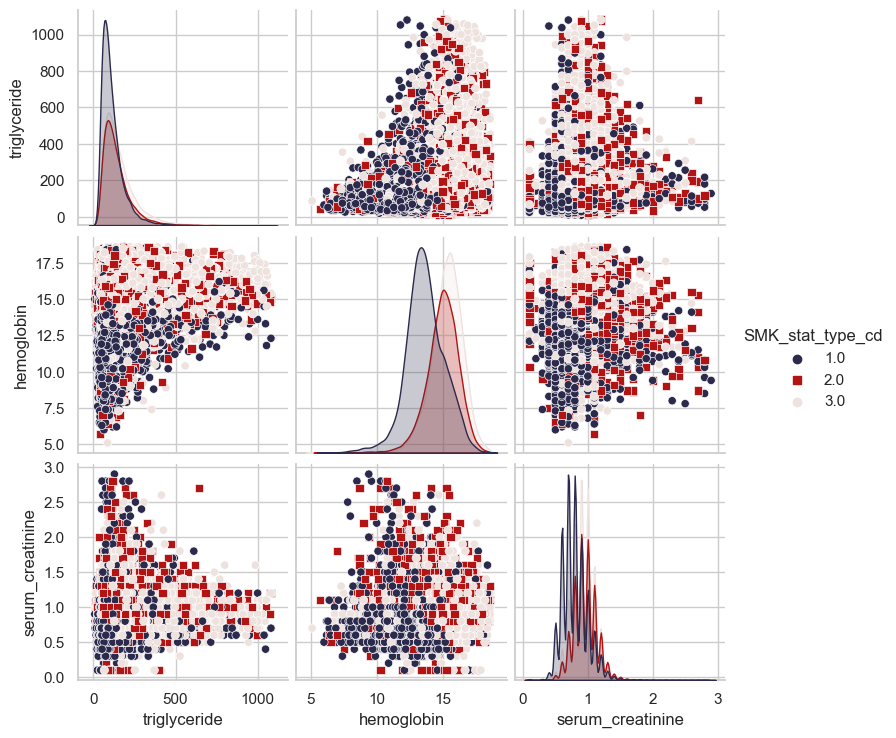

In [107]:
data_changed = {
    'triglyceride': data["triglyceride"], 'hemoglobin': data["hemoglobin"], 'serum_creatinine': data["serum_creatinine"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd
618304      33.0      37.0      133.0               3.0
29865       30.0      18.0       62.0               1.0
157628      18.0      12.0       36.0               1.0
160837      24.0      25.0       33.0               1.0
350588      28.0      33.0       19.0               2.0


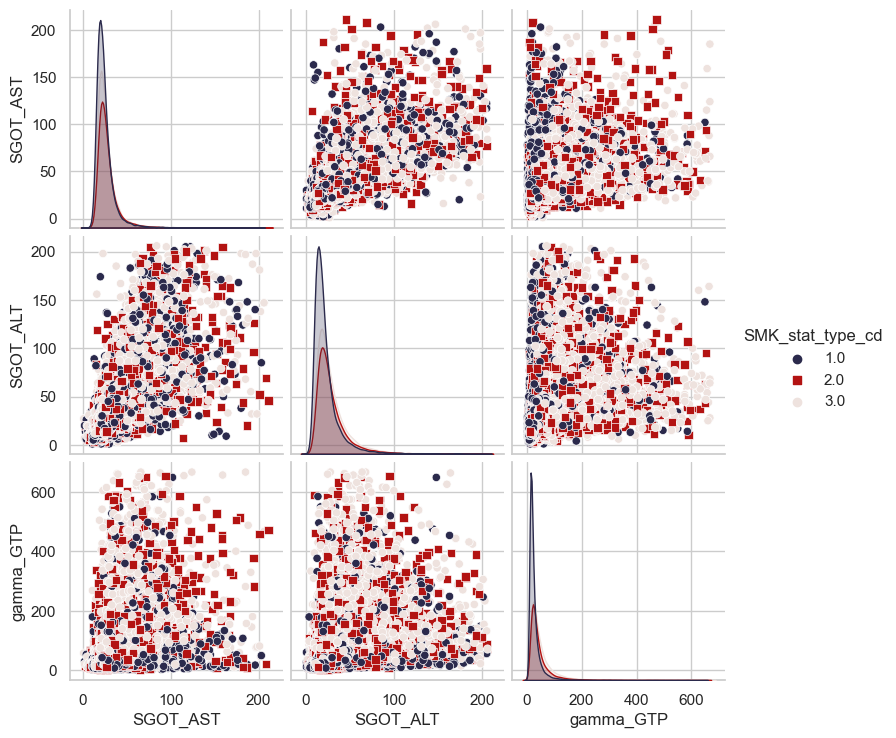

In [108]:
data_changed = {
    'SGOT_AST': data["SGOT_AST"], 'SGOT_ALT': data["SGOT_ALT"], 'gamma_GTP': data["gamma_GTP"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

### Dimensionality Reduction

In [109]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [110]:
from sklearn.decomposition import PCA
def workinginpca(data , n_components=1):
    pca = PCA(n_components)

    pca_result = pca.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Display the result
    print(f"workinginpca :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_loss = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_loss:.2%}")

In [111]:
from sklearn.decomposition import TruncatedSVD
def workinginsvd(data,n_components=1):
    svd = TruncatedSVD(n_components)

    transformed_data =  svd.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    print(f"workinginsvd :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2%}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_lost:.2%}")

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def workinginlda(data , target ,n_components=1):
    lda = LinearDiscriminantAnalysis(n_components = n_components , solver='eigen')
    X_lda = lda.fit_transform(data, target)

    # Calculate the explained variance ratio
    explained_variance_ratio = lda.explained_variance_ratio_

    # Calculate the proportion of data retained
    data_retained = np.sum(explained_variance_ratio)

    print(f"workinginlda :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]

    print(f"\t\tProportion of Data Retained: {data_retained:.2%}")
    print(f"\t\tProportion of Data lost: {data_lost:.2%}")

As there are approx. 1M data-points, but just 21~22 features.

* So, dropping columns at the cost of 1~2% data-lost can leave us with very few column.
* So, I decide to drop columns when cost of data-lost is below 0.5%

#### Working in 'height', 'weight', 'waistline'

In [113]:
size= len(data[current_y_is_smoking_or_drinking].value_counts())-1
size

2

In [114]:
workinginpca(data[['height', 'weight', 'waistline']] ,2)
workinginsvd(data[['height', 'weight', 'waistline']] ,2)
workinginlda(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking] ,size)

workinginpca :
		Explained Variance Ratio: 0.79
		Data Lost: 21.24%
workinginsvd :
		Explained Variance Ratio: 55.47%
		Data Lost: 44.53%
workinginlda :
		Explained Variance Ratio: 0.98
		Proportion of Data Retained: 100.00%
		Proportion of Data lost: 1.72%


#### working 'sight_left', 'sight_right'

In [115]:
workinginpca(data[['sight_left', 'sight_right']])
workinginsvd(data[['sight_left', 'sight_right']])
workinginlda(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.65
		Data Lost: 35.29%
workinginsvd :
		Explained Variance Ratio: 64.71%
		Data Lost: 35.29%
workinginlda :
		Explained Variance Ratio: 1.00
		Proportion of Data Retained: 99.97%
		Proportion of Data lost: 0.03%


I decide to replace the above columns with their LDA counter-part

In [116]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_l_r'] = lda.fit_transform(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

data.drop(['sight_left', 'sight_right'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  tot_chole  \
0    0   60     150      55       79.0  112.0  69.0   88.0      216.0   
1    0   45     160      50       51.5  103.0  65.0  103.0      177.0   

   HDL_chole  LDL_chole  triglyceride  hemoglobin  serum_creatinine  SGOT_AST  \
0       50.0      150.0          82.0        13.6               0.5      31.0   
1       50.0      112.0          74.0        12.0               0.8      18.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_sight_l_r  
0      23.0       18.0               1.0       0               -0.932997  
1      12.0       17.0               1.0       1               -0.724690

#### working in SBP AND BLDS


In [117]:
workinginpca(data[['SBP', 'BLDS']])
workinginsvd(data[['SBP', 'BLDS']])
workinginlda(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.75
		Data Lost: 25.49%
workinginsvd :
		Explained Variance Ratio: 53.56%
		Data Lost: 46.44%
workinginlda :
		Explained Variance Ratio: 0.99
		Proportion of Data Retained: 98.97%
		Proportion of Data lost: 1.03%


#### working in tot_chole, LDL_chole

In [118]:
workinginpca(data[['tot_chole', 'LDL_chole']])
workinginsvd(data[['tot_chole', 'LDL_chole']])
workinginlda(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.95
		Data Lost: 5.39%
workinginsvd :
		Explained Variance Ratio: 91.07%
		Data Lost: 8.93%
workinginlda :
		Explained Variance Ratio: 1.00
		Proportion of Data Retained: 99.73%
		Proportion of Data lost: 0.27%


Deciding to choose the lda replacement of ['tot_chole', 'LDL_chole']

In [119]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_tot_chole_LDL_chole'] = lda.fit_transform(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

data.drop(['tot_chole', 'LDL_chole'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  HDL_chole  \
0    0   60     150      55       79.0  112.0  69.0   88.0       50.0   
1    0   45     160      50       51.5  103.0  65.0  103.0       50.0   

   triglyceride  hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0          82.0        13.6               0.5      31.0      23.0       18.0   
1          74.0        12.0               0.8      18.0      12.0       17.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_sight_l_r  \
0               1.0       0               -0.932997   
1               1.0       1               -0.724690   

   LDA_combined_tot_chole_LDL_chole  
0                         -1.109719  
1                         -1.015703

#### working in SGOT_AST and SGOT_ALT

In [120]:
workinginpca(data[['SGOT_AST', 'SGOT_ALT']])
workinginsvd(data[['SGOT_AST', 'SGOT_ALT']])
workinginlda(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.89
		Data Lost: 10.79%
workinginsvd :
		Explained Variance Ratio: 86.37%
		Data Lost: 13.63%
workinginlda :
		Explained Variance Ratio: 0.96
		Proportion of Data Retained: 96.00%
		Proportion of Data lost: 4.00%


In [121]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_SGOT_AST_SGOT_ALT'] = lda.fit_transform(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

data.drop(['SGOT_AST', 'SGOT_ALT'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  HDL_chole  \
0    0   60     150      55       79.0  112.0  69.0   88.0       50.0   
1    0   45     160      50       51.5  103.0  65.0  103.0       50.0   

   triglyceride  hemoglobin  serum_creatinine  gamma_GTP  SMK_stat_type_cd  \
0          82.0        13.6               0.5       18.0               1.0   
1          74.0        12.0               0.8       17.0               1.0   

   DRK_YN  LDA_combined_sight_l_r  LDA_combined_tot_chole_LDL_chole  \
0       0               -0.932997                         -1.109719   
1       1               -0.724690                         -1.015703   

   LDA_combined_SGOT_AST_SGOT_ALT  
0                       -0.359128  
1                       -0.757860

### Imports

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf


### Splitting and Scaling Data

In [123]:
new_data = data.copy().sample(n=100000)
X = new_data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y = new_data[current_y_is_smoking_or_drinking]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [124]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
logreg_pred_train = logreg_model.predict(X_train)


print("Logistic Regression:")

print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("Classification Report:\n", classification_report(y_test, logreg_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression:
Accuracy: 0.6557
Classification Report:
               precision    recall  f1-score   support

         1.0       0.88      0.73      0.80      7831
         2.0       0.53      0.51      0.52      5547
         3.0       0.56      0.69      0.62      6622

    accuracy                           0.66     20000
   macro avg       0.66      0.64      0.64     20000
weighted avg       0.68      0.66      0.66     20000

confusion_matrix:
 [[5731  945 1155]
 [ 337 2805 2405]
 [ 466 1578 4578]]


In [125]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes:
Accuracy: 0.6209
Classification Report:
               precision    recall  f1-score   support

         1.0       0.77      0.76      0.77      7831
         2.0       0.49      0.51      0.50      5547
         3.0       0.56      0.55      0.55      6622

    accuracy                           0.62     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000

confusion_matrix:
 [[5933  897 1001]
 [ 785 2848 1914]
 [ 942 2043 3637]]


1. Simple
- Logistic Regression:
Accuracy: 0.6520003150102378
- Naive Bayes:
Accuracy: 0.6153488738383998
- ANN 
Test Accuracy: 0.3923531174659729

2. LDA
- Logistic Regression:
Accuracy: 0.6515301712173961
- Naive Bayes:
Accuracy: 0.62956295550251
- ANN: Test Accuracy: 0.3922218680381775

### Tensorflow models

In [126]:
X.shape

(100000, 16)

In [127]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array([y_train]).reshape(-1, 1))
print(enc.categories_)
y_train = enc.transform(np.array([y_train]).reshape(-1, 1)).toarray()
y_test = enc.transform(np.array([y_test]).reshape(-1, 1)).toarray()
X_train.shape, y_train.shape , X_test.shape , y_test.shape

[array([1., 2., 3.])]


((80000, 16), (80000, 3), (20000, 16), (20000, 3))

In [128]:
activation1 = 'relu'
activation2 = 'sigmoid'

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=activation1,
                          input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(256, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(16, activation=activation1),
    tf.keras.layers.Dense(size+1, activation=activation2),
    # tf.keras.layers.Dense(1, activation=activation2),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
cce = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True,
    reduction="auto",
    name="categorical_crossentropy",
)

model.compile(optimizer=optimizer,
              loss=cce, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128,
                    validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
# 0.6498000025749207 , 0.6503999829292297 ,  0.6521499752998352 ,  0.6441500186920166 ,0.6474499702453613

Epoch 1/30
625/625 [==============================] - 5s 5ms/step - loss: 0.8165 - accuracy: 0.6391 - val_loss: 0.7799 - val_accuracy: 0.6543
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 0.7955 - accuracy: 0.6493 - val_loss: 0.7786 - val_accuracy: 0.6573
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.7888 - accuracy: 0.6525 - val_loss: 0.7749 - val_accuracy: 0.6600
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7901 - accuracy: 0.6503 - val_loss: 0.7842 - val_accuracy: 0.6574
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.7869 - accuracy: 0.6532 - val_loss: 0.7804 - val_accuracy: 0.6558
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.7854 - accuracy: 0.6536 - val_loss: 0.7730 - val_accuracy: 0.6604
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.7836 - accuracy: 0.6529 - val_loss: 0.7776 - val_accuracy: 0.6549
Epoch 

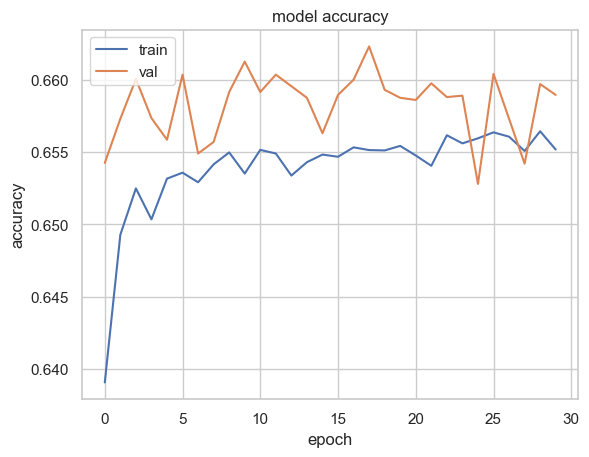

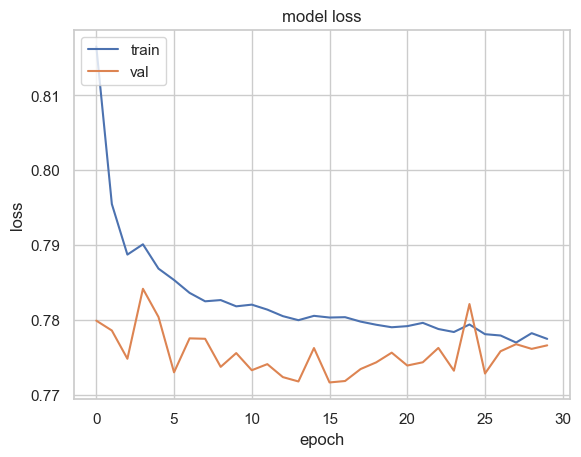

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()


In [130]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = (y_predicted_labels)

print(predicted_labels[0:8])

625/625 [==============================] - 1s 1ms/step
[[0.34617347 0.47617945 0.774193  ]
 [0.3626318  0.6865568  0.74519056]]
[[0.34617347 0.47617945 0.774193  ]
 [0.3626318  0.6865568  0.74519056]
 [0.66318834 0.21648034 0.27440706]
 [0.25111    0.4761574  0.8805394 ]
 [0.33831742 0.47617778 0.78425163]
 [0.36761752 0.47618392 0.7456519 ]
 [0.7260683  0.18772885 0.1867948 ]
 [0.7314718  0.18158326 0.17991742]]


In [131]:
y_true = np.argmax(y_test , axis =1)
y_pred = np.argmax(predicted_labels , axis =1)


In [132]:
cm = tf.math.confusion_matrix(labels=y_true,predictions=y_pred)
print(cm)

tf.Tensor(
[[5797  991 1043]
 [ 395 3022 2130]
 [ 535 1727 4360]], shape=(3, 3), dtype=int32)
